In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'

import seaborn
import networkx
import pandas

Populating the interactive namespace from numpy and matplotlib


In [2]:
contig_summary = pandas.read_excel( 'data/metasub_final_list_of_viral_contigs.xlsx',
                                    sheet_name='viral_contigs',
                                    header=1,
                                    usecols=[1,2,3,4,5] )

print( '%s viral contigs' % contig_summary.shape[0] )

contig_summary.head()

16584 viral contigs


,Contig_ID,gene#,VPFs,Pfams,Length
0,CSC3_NODE_1001_length_10123_cov_5.97825,13,5,0,10123
1,CSC3_NODE_1003_length_10119_cov_11.6328,16,13,1,10119
2,CSC3_NODE_100_length_32592_cov_7.52227,18,14,0,32592
3,CSC3_NODE_1012_length_10091_cov_6.15315,23,7,2,10091
4,CSC3_NODE_1013_length_10074_cov_4.86745,21,5,1,10074


In [3]:
viral_clusters = pandas.read_excel( 'data/metasub_final_list_of_viral_contigs.xlsx',
                                    sheet_name='viral_clusters',
                                    header=1,
                                    usecols=[1,2])

print( '%s viral contigs in %s clusters' % ( viral_clusters.shape[0],
                                             len( set( viral_clusters['Viral_Cluster'] ) ) ) )

viral_clusters.head()

14658 viral contigs in 2063 clusters


,Viral_contig,Viral_Cluster
0,REF:Gammaproteobacteria_gi_559192198-185032-20...,1
1,REF:Gammaproteobacteria_gi_331676385-68809-103169,1
2,REF:Gammaproteobacteria_gi_555578523-578552-62...,1
3,REF:Gammaproteobacteria_gi_485859993,1
4,REF:Gammaproteobacteria_gi_485864642,1


In [4]:
print( 'There are %s MetaSUB viral contigs in viral clusters.' %
    len( set( viral_clusters.Viral_contig ).intersection( set( contig_summary.Contig_ID ) ) ) )

There are 6979 MetaSUB viral contigs in viral clusters.


In [132]:
metadata = pandas.read_excel( 'data/MetaSub_Complete_CSD16_17_with_HudsonAlpha_ID_v1.1.xlsx',
                              sheet_name='MetaSub_Complete_CSD16_17_with_',
                              header=0, )
                              #usecols=[0,2])

metadata.head()

,MetaData,TIER,sample_ID,barcode_ID,HA_ID,CAP_uuid,HA_project,HA_project_title,HA_order_ID,HA_sample_well,...,meta_avg_ridership_16,meta_latitude,meta_longitude,meta_object_swabbed,meta_surface_material,meta_temperature,meta_duplicate,meta_uuid,core_project,metasub_project_name
0,YES,TIER1,CSD16-ILR-001,NaN,4866-KIU-0001,haib17KIU4866_H7HJMCCXY_SL272738,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/7,...,NaN,8.48466,4.563008,Staircase_,Metal,NaN,NaN,NaN,core,CSD16
1,YES,TIER1,CSD16-ILR-002,NaN,4866-KIU-0002,haib17KIU4866_H7HJMCCXY_SL272739,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/8,...,NaN,8.45738,4.576873,Mirror...__travelling_to_jos_and_makurdi,NaN,NaN,NaN,NaN,core,CSD16
2,YES,TIER1,CSD16-ILR-003,NaN,4866-KIU-0003,haib17KIU4866_H7HJMCCXY_SL272740,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/9,...,NaN,8.45741,4.576852,Radio_transmittor,Glass,NaN,NaN,NaN,core,CSD16
3,YES,TIER1,CSD16-ILR-004,NaN,4866-KIU-0004,haib17KIU4866_H7HJMCCXY_SL272741,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/10,...,NaN,8.45738,4.576812,Hand_brake,Leather,NaN,NaN,NaN,core,CSD16
4,YES,TIER1,CSD16-ILR-005,NaN,4866-KIU-0005,haib17KIU4866_H7HJMCCXY_SL272742,haib17KIU4866,MetaSUB_CSD16,7399.0,3/C/11,...,NaN,8.45736,4.576840,"Steering,",Leather,NaN,NaN,NaN,core,CSD16


In [6]:
sample_uuids = []
for contig in viral_clusters.Viral_contig :
    if contig.__contains__( '_NODE_' ) and not contig.__contains__( '_____' ) :
        sample_uuids.append( contig.split('_NODE_')[0] )
    else :
        sample_uuids.append( None )

viral_clusters['CAP_uuid'] = sample_uuids
viral_clusters.dropna().head()

,Viral_contig,Viral_Cluster,CAP_uuid
217,haib17CEM4890_HKC32ALXX_SL254760_NODE_382_leng...,1,haib17CEM4890_HKC32ALXX_SL254760
231,haib17CEM4890_HKC32ALXX_SL254680_NODE_2240_len...,1,haib17CEM4890_HKC32ALXX_SL254680
235,haib17CEM5106_HCVMTCCXY_SL269616_NODE_737_leng...,1,haib17CEM5106_HCVMTCCXY_SL269616
236,haib17CEM5106_HCV72CCXY_SL269743_NODE_1413_len...,1,haib17CEM5106_HCV72CCXY_SL269743
242,haib17CEM4890_H2NYMCCXY_SL254771_NODE_3551_len...,1,haib17CEM4890_H2NYMCCXY_SL254771


In [112]:
latlon_table = metadata[ metadata.CAP_uuid.isin( viral_clusters.CAP_uuid ) ][ [ 'meta_latitude',
                                                                                'meta_longitude' ] ].dropna()

latlon_table.head()

,meta_latitude,meta_longitude
0,8.48466,4.563008
3,8.45738,4.576812
4,8.45736,4.576840
5,8.4574,4.576872
6,8.45743,4.576958


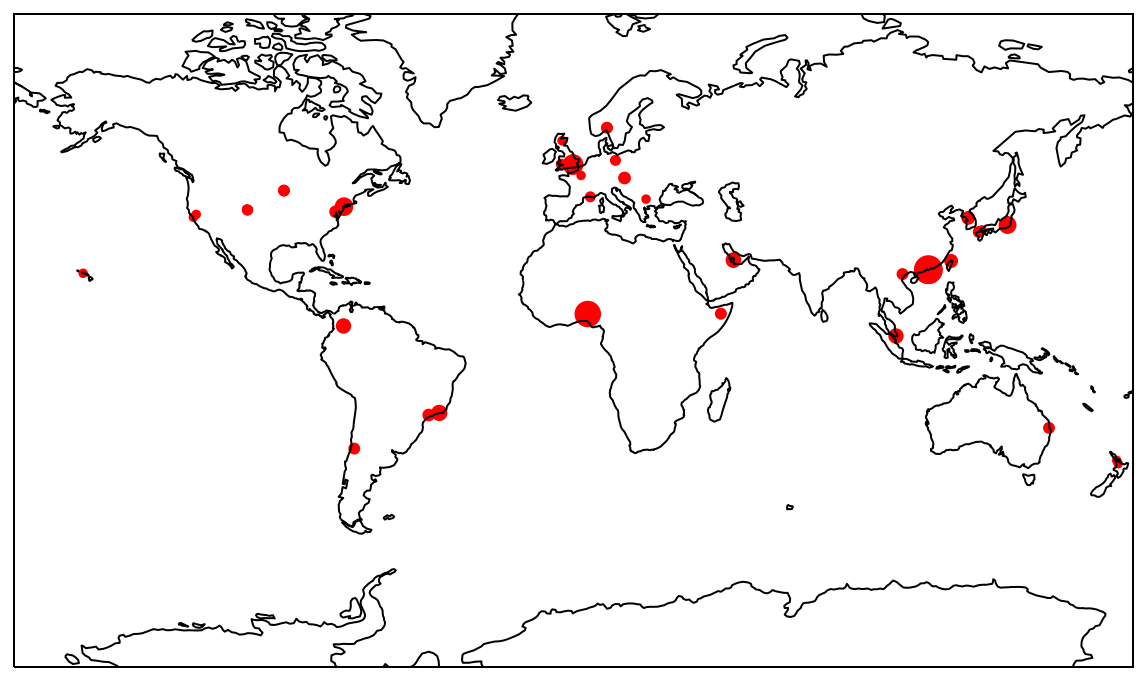

In [110]:
import cartopy.crs
from cartopy.io.img_tiles import OSM

# cartopy hits a segmentation fault if installed using 
# pre-compiled binaries from PyPI, but this can be fixed
# by installing shapely with locally compiled binaries.
#
# https://stackoverflow.com/questions/52374356/cartopy-examples-produce-a-segmentation-fault

figure( figsize=(12,6) )

latlon_table = metadata[ metadata.CAP_uuid.isin( viral_clusters.CAP_uuid ) ][ [ 'meta_latitude',
                                                                                'meta_longitude' ] ].dropna()

locations = {}
for n,(lat,lng) in latlon_table.iterrows() :
    key = '{},{}'.format( round(lat,1), round(lng,1) )
    if not key in locations :
        locations[ key ] = { 'count' : 1, 'lat' : lat, 'lng' : lng }
    else :
        locations[ key ]['count'] = locations[ key ]['count'] + 1

ax = plt.axes( projection=cartopy.crs.Miller() )
#ax.add_image( GoogleTiles( style='satellite' ), 3 )
ax.coastlines()
ax.set_extent( [-180, 180, -80, 80] )

x,y,s = [],[],[]
for key,value in locations.items() :
    x.append( value['lng']   )
    y.append( value['lat']   )
    s.append( value['count'] )
    
    #plot( [value['lng']], [value['lat']], 'ro', s=[value['count']], transform=cartopy.crs.Geodetic() )

s = 8*(array(s)*np.pi)**0.5

scatter( x, y, s=s, color='r', transform=cartopy.crs.Geodetic() )
savefig( 'metasub_viral_map.svg' )

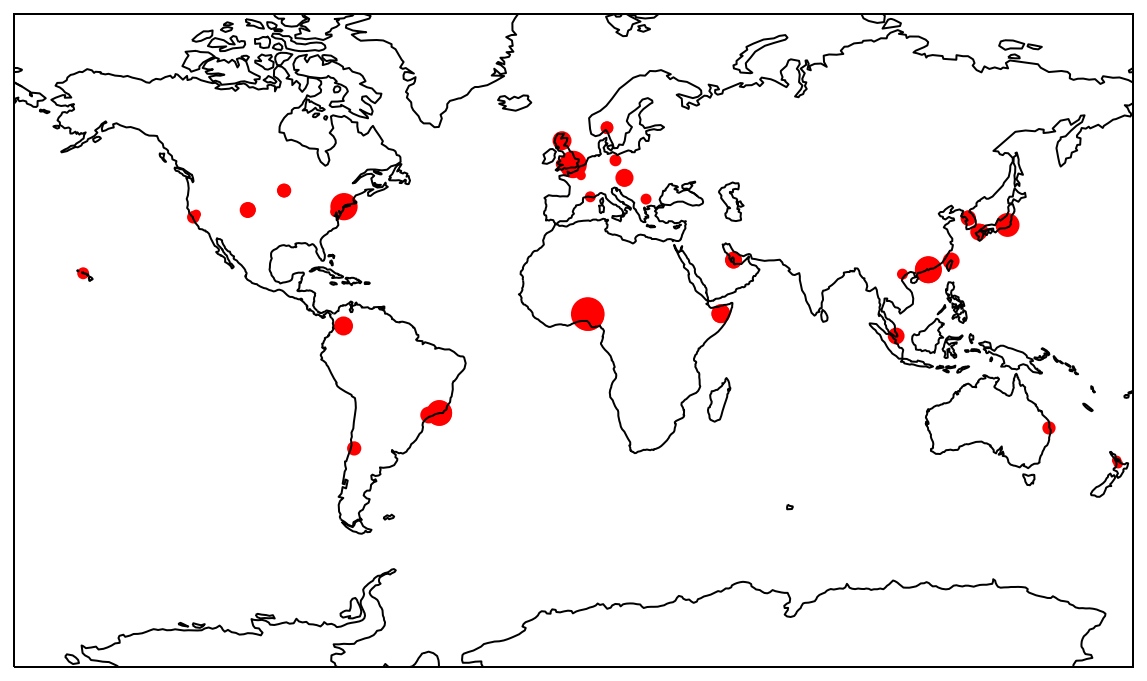

In [160]:
figure( figsize=(12,6) )

latlon_table = viral_clusters.merge(
                 metadata[ metadata.CAP_uuid.isin( 
                 viral_clusters.CAP_uuid ) ], on='CAP_uuid' )[ [ 'Viral_Cluster',
                                                                 'meta_latitude',
                                                                 'meta_longitude'] ].dropna()

locations = {}
for n,(cluster_id,lat,lng) in latlon_table.iterrows() :
    key = '{},{}'.format( round(lat,1), round(lng,1) )
    if not key in locations :
        locations[ key ] = { 'clusters' : set((cluster_id,)), 'lat' : lat, 'lng' : lng }
    else :
        locations[ key ]['clusters'].add( cluster_id )

ax = plt.axes( projection=cartopy.crs.Miller() )
#ax.add_image( GoogleTiles( style='satellite' ), 3 )
ax.coastlines()
ax.set_extent( [-180, 180, -80, 80] )

x,y,s = [],[],[]
for key,value in locations.items() :
    x.append( value['lng']   )
    y.append( value['lat']   )
    s.append( len(value['clusters']) )
    
    #plot( [value['lng']], [value['lat']], 'ro', s=[value['count']], transform=cartopy.crs.Geodetic() )

s = 8*(array(s)*np.pi)**0.5

scatter( x, y, s=s, color='r', transform=cartopy.crs.Geodetic() )
savefig( 'metasub_viralcluster_map.svg' )

In [ ]:
from itertools import combinations
import cartopy.feature as cfeature

figure( figsize=(12,6) )

#latlon_table = metadata[ metadata.CAP_uuid.isin( viral_clusters.CAP_uuid ) ][ [ 'meta_latitude',
#                                                                                'meta_longitude' ] ].dropna()

latlon_table = viral_clusters.merge(
                 metadata[ metadata.CAP_uuid.isin( 
                 viral_clusters.CAP_uuid ) ], on='CAP_uuid' )[ [ 'Viral_Cluster',
                                                                 'meta_latitude',
                                                                 'meta_longitude',
                                                                 'CAP_num_reads'] ].dropna()

clump_factor = 20.0

locations = {}
for n,(cluster_id,lat,lng,nreads) in latlon_table.iterrows() :
    
    # There are a few formatting errors in the metadata spreadsheet
    # exclude records that have incomplete or malformed metadata 
    if not type( nreads ) == int : continue
    if nreads > 1000000000 : continue
    
    key = '{},{}'.format( round(round(lat/clump_factor)*clump_factor),
                          round(round(lng/clump_factor)*clump_factor) ) 
    if not key in locations :
        locations[ key ] = { 'clusters' : set((cluster_id,)), 
                             'count'    : 1,
                             'lat'      : lat,
                             'lng'      : lng,
                             'nreads'   : nreads }
    else :
        locations[ key ]['clusters'].add( cluster_id )
        locations[ key ]['count'] = locations[ key ]['count'] + 1
        locations[ key ]['nreads'] = locations[ key ]['nreads'] + nreads
        
ax = plt.axes( projection=cartopy.crs.Miller() )
#ax.add_image( GoogleTiles( style='satellite' ), 3 )
ax.coastlines()
ax.set_extent( [-180, 180, -60, 80] )

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)


x,y,s1,s2 = [],[],[],[]
for key,value in locations.items() :
    x.append( value['lng']   )
    y.append( value['lat']   )
    s1.append( value['count'] / value['nreads'] )
    s2.append( len( value['clusters'] ) )
    
    #plot( [value['lng']], [value['lat']], 'ro', s=[value['count']], transform=cartopy.crs.Geodetic() )

s1 = 1000000*(array(s1)*np.pi)**0.5
s2 = 10*(array(s1)*np.pi)**0.5

scatter( x, y, s=s1, 
         color='black', alpha=1, facecolors='none', lw=0.8,
         transform=cartopy.crs.Geodetic() )

scatter( x, y, s=s2, 
         color='none', alpha=0.5, facecolors='red', lw=0.8,
         transform=cartopy.crs.Geodetic() )

for a,b in combinations(locations.values(), 2) :
    plot( [a['lng'], b['lng'] ],
          [a['lat'], b['lat'] ],
          color='b', alpha=0.5,
          #lw=100000000*len(a['clusters'].intersection(b['clusters']) )/(a['nreads']+b['nreads']),
          lw=len(a['clusters'].intersection(b['clusters']) )/10,
          transform=cartopy.crs.Geodetic() )
    
savefig( 'figures/metasub_viralbiogeo.pdf' )
savefig( 'figures/metasub_viralbiogeo.png' )

In [374]:
import operator
common_clusters = []
for (A,a),(B,b) in combinations(locations.items(), 2) :
    common_clusters.append( ( A+':'+B, a['clusters'].intersection( b['clusters'] ) ) )
sorted( common_clusters, key=operator.itemgetter(1) )

[('40,140:20,100', set()),
 ('40,140:40,0', set()),
 ('40,140:-40,180', set()),
 ('0,0:40,-120', set()),
 ('0,0:-40,-80', set()),
 ('0,0:20,100', set()),
 ('0,0:40,0', set()),
 ('0,0:-40,180', set()),
 ('60,0:-20,160', set()),
 ('60,0:20,-160', set()),
 ('60,0:40,120', set()),
 ('60,0:0,40', set()),
 ('60,0:20,100', set()),
 ('60,0:40,0', set()),
 ('60,0:-40,180', set()),
 ('40,20:20,100', set()),
 ('40,20:40,0', set()),
 ('40,20:-40,180', set()),
 ('-20,-40:20,100', set()),
 ('-20,-40:40,0', set()),
 ('-20,-40:-40,180', set()),
 ('40,-80:-40,-80', set()),
 ('40,-80:20,100', set()),
 ('40,-80:40,0', set()),
 ('40,-80:-40,180', set()),
 ('20,60:-40,-80', set()),
 ('20,60:20,100', set()),
 ('20,60:40,0', set()),
 ('20,60:-40,180', set()),
 ('0,-80:20,-160', set()),
 ('0,-80:20,100', set()),
 ('0,-80:40,0', set()),
 ('0,-80:-40,180', set()),
 ('20,120:-40,-80', set()),
 ('20,120:20,100', set()),
 ('20,120:40,0', set()),
 ('20,120:-40,180', set()),
 ('40,-100:-40,-80', set()),
 ('40,-100:2

In [236]:
vcluster_metadata = pandas.read_csv( 'data/table_vclusters_metasub.txt', sep='\t' )
hong_kong_phage = vcluster_metadata[ vcluster_metadata.Viral_Cluster == 62 ]
hong_kong_phage

,Viral_contig,length,Viral_Cluster,habitat,Lat,Lon
6418,haib18CEM5453_HNHKFCCXY_SL345989_NODE_12_lengt...,17439,62,Hong_Kong,22.371726,114.185532
6419,haib18CEM5453_HNHKFCCXY_SL345988_NODE_68_lengt...,17435,62,Hong_Kong,22.370853,114.184674
6420,haib18CEM5453_HNHKFCCXY_SL345927_NODE_32_lengt...,17433,62,Hong_Kong,22.370773,114.185232
6421,haib18CEM5453_HNHKFCCXY_SL345971_NODE_8_length...,17433,62,Hong_Kong,22.370456,114.184674
6422,haib18CEM5453_HNHKFCCXY_SL345982_NODE_104_leng...,17411,62,Hong_Kong,22.371885,114.185618
6423,haib18CEM5453_HNHKFCCXY_SL345975_NODE_33_lengt...,17391,62,Hong_Kong,22.370535,114.18579
6424,haib18CEM5453_HNHKFCCXY_SL345981_NODE_79_lengt...,17361,62,Hong_Kong,22.371646,114.185532
6425,haib18CEM5453_HNHKFCCXY_SL345926_NODE_5_length...,17357,62,Hong_Kong,22.371646,114.185532
6426,haib18CEM5453_HNHKFCCXY_SL345911_NODE_80_lengt...,17343,62,Hong_Kong,22.371091,114.185275
6427,haib18CEM5453_HNHKFCCXY_SL345983_NODE_4_length...,17343,62,Hong_Kong,22.37117,114.185532


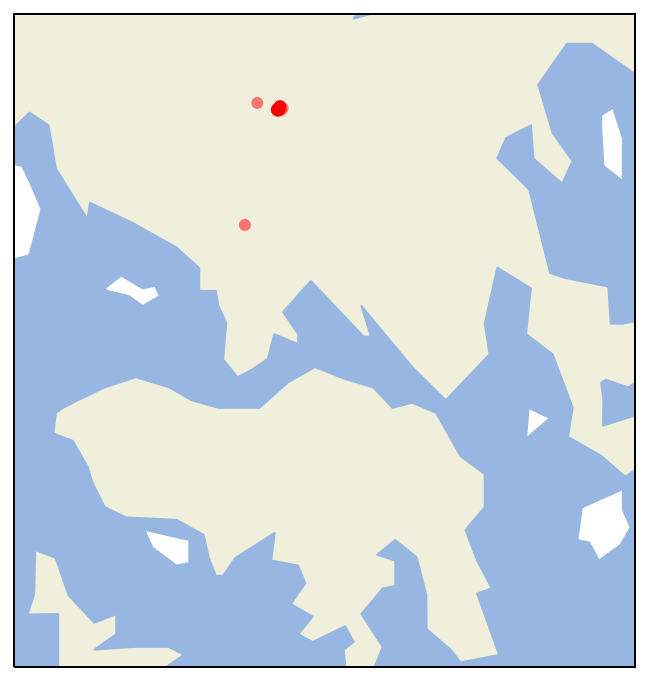

In [361]:
from itertools import combinations
import cartopy.feature as cfeature

figure( figsize=(12,6) )

ax = plt.axes( projection=cartopy.crs.Miller() )
#ax = plt.axes( projection=imagery.crs )
#ax.add_image( GoogleTiles( style='satellite' ), 3 )
#ax.coastlines()
ax.set_extent( (114.1, 114.3, 22.2, 22.4), cartopy.crs.Geodetic() )

#ax.add_image( imagery, 14 )
ax.add_feature(cfeature.LAND.with_scale('10m'))
ax.add_feature(cfeature.OCEAN.with_scale('10m'))
#ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.add_feature(cfeature.LAKES.with_scale('10m'), alpha=0.5)
ax.add_feature(cfeature.RIVERS.with_scale('10m'))

x,y = [],[]
for n,row in hong_kong_phage.iterrows() :
    x.append( float(row.Lon) )
    y.append( float(row.Lat) )
    
scatter( x, y, 
         color='none', alpha=0.5, facecolors='red', lw=0.8, transform=cartopy.crs.Geodetic() )

savefig( 'metasub_hongkong_viralcluster.pdf' )
savefig( 'metasub_hongkong_viralcluster.png' )

In [254]:
import gzip
from Bio import SeqIO

records = []
with open( 'data/hong_kong_phage.fasta', 'w' ) as f :
    with gzip.open( 'data/viral_contigs.fasta.gz', 'rt' ) as handle :
        for n,record in enumerate( SeqIO.parse( handle, 'fasta' ) ) :
            if record.id in set( hong_kong_phage.Viral_contig ) :
                print(record.id)
                f.write( record.format( 'fasta' ) )

haib18CEM5453_HNHKFCCXY_SL345985_NODE_40_length_11303_cov_5.89678
haib18CEM5453_HNHKFCCXY_SL345925_NODE_59_length_9023_cov_6.84612
haib18CEM5453_HNHKFCCXY_SL345956_NODE_31_length_11207_cov_9.2023
haib18CEM5453_HNHKFCCXY_SL345920_NODE_31_length_11305_cov_7.15049
haib18CEM5453_HNHKFCCXY_SL345953_NODE_8_length_16987_cov_62.9656
haib18CEM5453_HNHKFCCXY_SL345926_NODE_5_length_17357_cov_13.0197
haib18CEM5453_HNHKFCCXY_SL346095_NODE_30_length_15286_cov_7.04366
haib18CEM5453_HNHKFCCXY_SL345986_NODE_449_length_9172_cov_8.17615
haib18CEM5453_HNHKFCCXY_SL345986_NODE_547_length_8023_cov_9.37236
haib18CEM5453_HNHKFCCXY_SL345983_NODE_4_length_17343_cov_9.88877
haib18CEM5453_HNHKFCCXY_SL345919_NODE_5_length_14978_cov_13.7823
haib18CEM5453_HNHKFCCXY_SL345995_NODE_38_length_13619_cov_33.2047
haib18CEM5453_HNHKFCCXY_SL345955_NODE_23_length_8134_cov_13.4168
haib18CEM5453_HNHKFCCXY_SL345969_NODE_60_length_12779_cov_7.87755
haib18CEM5453_HNHKFCCXY_SL345929_NODE_7_length_13704_cov_11.8297
haib18CEM5453_HNHK

In [318]:
min(hong_kong_phage.length), max(hong_kong_phage.length)

(7230, 17439)

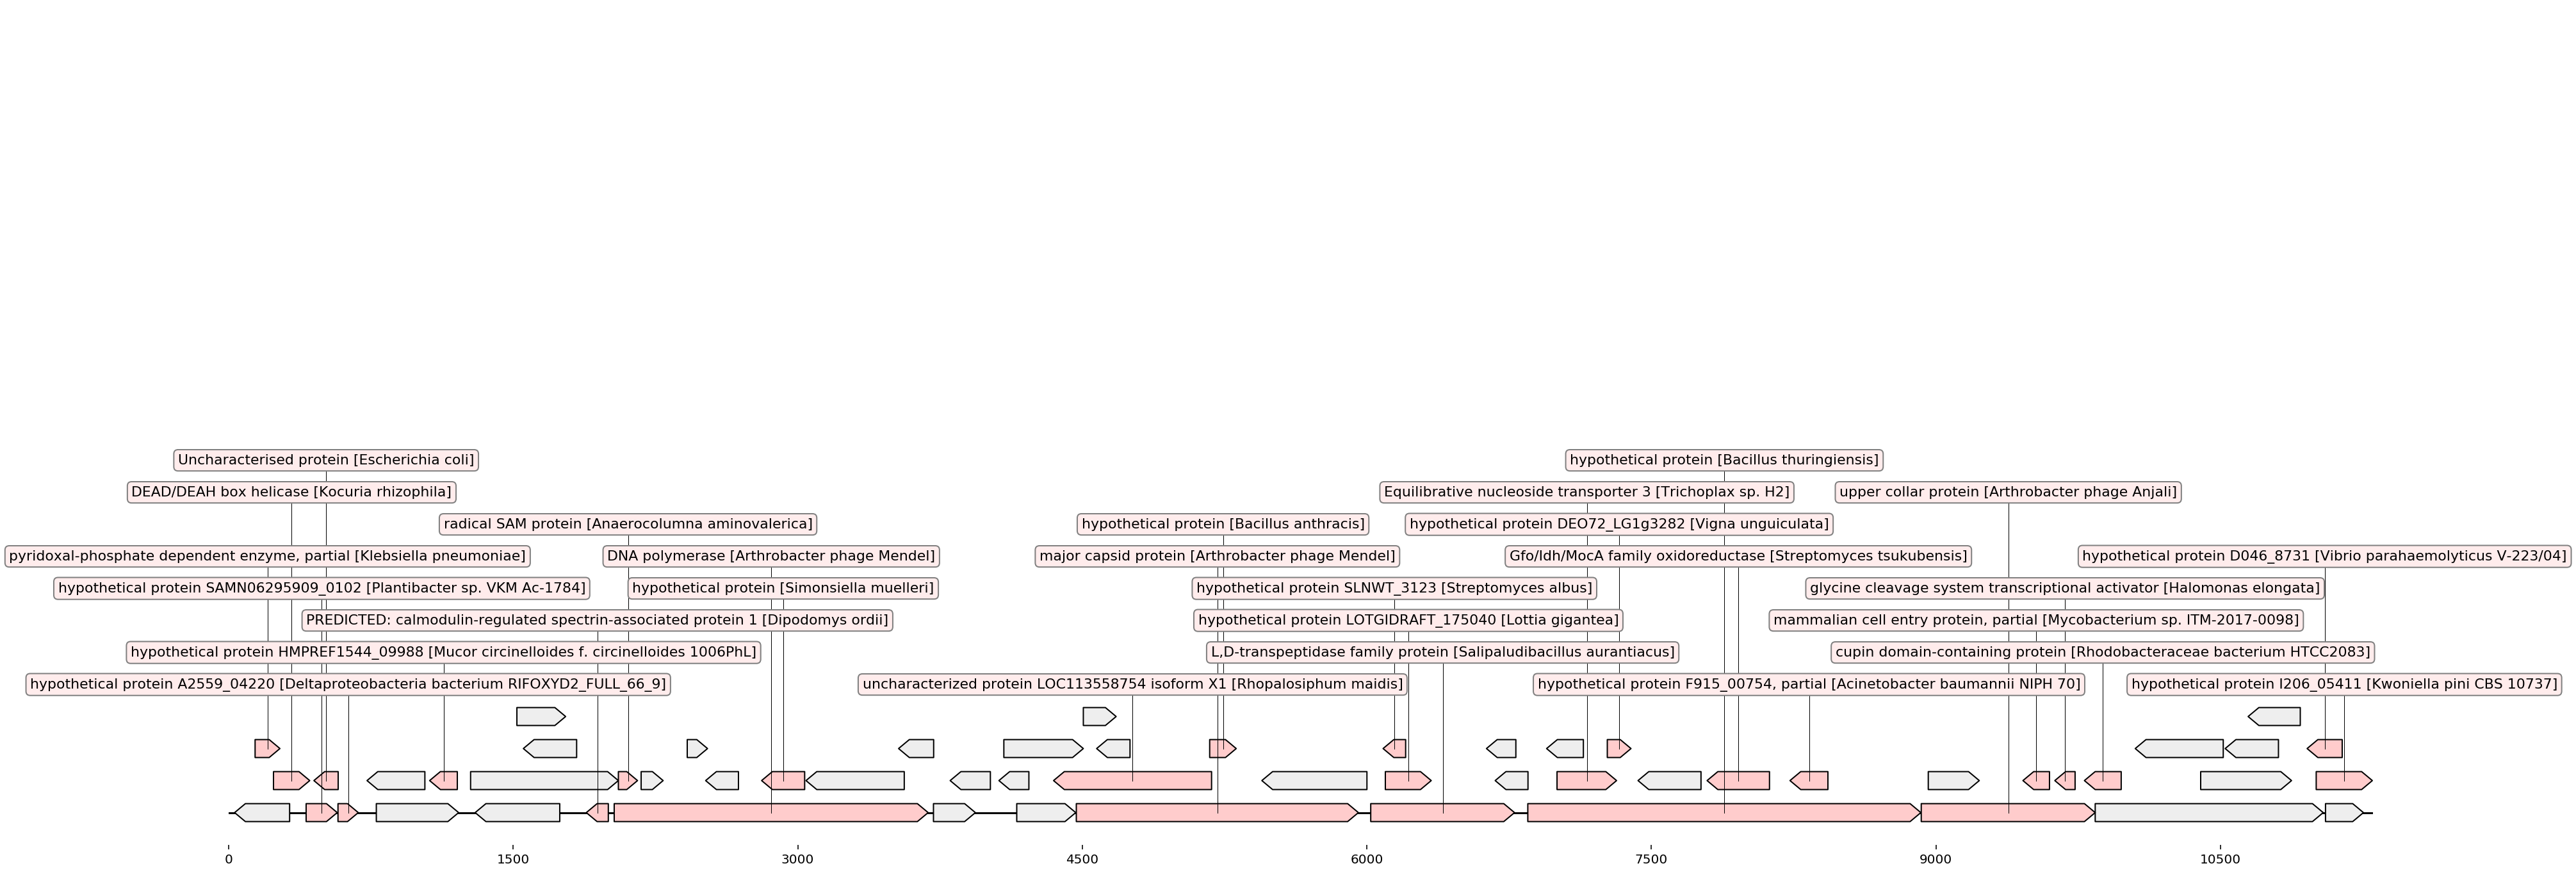

In [347]:
from dna_features_viewer import GraphicFeature, GraphicRecord

figure( figsize=(30,12) )

features = []
for n,row in pandas.read_csv( 'data/hong_kong_phage.orfs.txt', sep='\t').iterrows() :
    
    if row.stop - row.start < 100 : continue
    
    if not row.annotation == 'No SmartBLAST hits found' :
        color = '#ffcccc'
        #color = matplotlib.colors.rgb2hex( cmap( norm( row.correlation ) ) )
        annotation = row.annotation
    else :
        color = '#eeeeee'
        annotation = None
                        
    if row.strand == '+' :
        strand = +1 
    else :
        strand = -1
        
    features.append( GraphicFeature( start  = row.start,
                                     end    = row.stop, 
                                     strand = strand,
                                     color  = color,
                                     label  = annotation ) )

record = GraphicRecord(sequence_length=11303, features=features)
ax = axes()
gp = record.plot(ax)

In [25]:
import gzip
from Bio import SeqIO
from pyprind import ProgBar

progbar = ProgBar( contig_summary.shape[0], 'finding viral contigs...' )

with open( 'data/viral_contigs.fasta', 'w' ) as f :
    #with open( 'data/assemblies_5kb.fasta', 'rU' ) as handle:
    with gzip.open( 'data/assemblies_5kb.fasta.gz', 'rt' ) as handle :
        for n,record in enumerate( SeqIO.parse( handle, 'fasta' ) ) :
            if record.id in set( contig_summary.Contig_ID ) :
                f.write( record.format( 'fasta' ) )
                progbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:45:02


In [350]:
master = pandas.read_csv( 'data/metasub_MASTER_TABLE.txt', sep='\t' )

In [357]:
master

,Contig_ID,Country,gene#,VPFs,Pfams,Length,clusterID/sgID,Host-cluster,Host-Iso_spacers,Host-metaspacers,Habitat-metaspacer,Habitat-cluster
0,haib17CEM4890_H2NYMCCXY_SL254771_NODE_3551_len...,Nigeria,8,8,0,5969,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
1,haib17CEM4890_H2NYMCCXY_SL254783_NODE_5163_len...,Nigeria,10,10,0,7379,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
2,haib17CEM4890_HKC32ALXX_SL254680_NODE_2240_len...,Nigeria,7,6,0,7347,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
3,haib17CEM4890_HKC32ALXX_SL254760_NODE_382_leng...,Japan,8,7,0,8296,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
4,haib17CEM5080_H7VL7CCXY_SL267266_NODE_1362_len...,UK,9,9,0,7246,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
5,haib17CEM5080_H7VL7CCXY_SL267267_NODE_1254_len...,NaN,9,9,0,7246,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
6,haib17CEM5106_HCCGHCCXY_SL270259_NODE_311_leng...,UK,7,7,0,7246,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
7,haib17CEM5106_HCCGHCCXY_SL270260_NODE_626_leng...,UK,8,7,0,6932,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
8,haib17CEM5106_HCCGHCCXY_SL270315_NODE_403_leng...,UK,7,7,0,7246,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
9,haib17CEM5106_HCCGHCCXY_SL270469_NODE_304_leng...,UK,7,7,0,7246,1,"Escherichia_albertii,Escherichia_coli,Escheric...",Escherichia_fergusonii,NaN,Host-arthropoda,"Engineered-other,Engineered-subway,Freshwater,..."
